# Capstone project for Diana

![Course Hero](images/hero.png)

## Introduction

Describe what is your capstone project about.

## Data Set Selection

Mention the data set you selected for your capstone project, where did you find it, and why it was interesting to you

I found it in Kaggle

https://www.kaggle.com/datasets/reihanenamdari/breast-cancer

It might be a sad or sensitive subject, but I selected it because, what if ML could help us identify it quicker and save lives.

"About Dataset
This dataset of breast cancer patients was obtained from the 2017 November update of the SEER Program of the NCI, which provides information on population-based cancer statistics. The dataset involved female patients with infiltrating duct and lobular carcinoma breast cancer (SEER primary cites recode NOS histology codes 8522/3) diagnosed in 2006-2010. Patients with unknown tumour size, examined regional LNs, positive regional LNs, and patients whose survival months were less than 1 month were excluded; thus, 4024 patients were ultimately included."

## Data Examination

Let's start with the imports for the notebook.

Note: Remember to add in the `requirements.txt` file all the modules you use.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Get the selected data set into a pandas Dataframe.

Note: You need to add the right method to load the data.

In [40]:
df = pd.read_csv("dataset\Breast_Cancer.csv")

Find relevant information about the selected dataset.

- How many rows and columns does it has?
- Which characteristics does each column has?
    - Data type
    - Minimum and maximum values
    - Values distribution
    - Missing data
- Which columns are related or are dependent on each other? 
    - Which ones can be derived?
    - Which are good candidates for an hypothesis?

Note: Use pandas methods as shape, head, sample, groupby, describe and any other you can think of!

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [7]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [36]:
df.sample(7)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
2203,53,White,Divorced,T1,N1,IIA,Moderately differentiated,2,Regional,8,Positive,Positive,2,1,102,Alive
3277,47,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,20,Positive,Negative,2,2,27,Dead
2464,43,Black,Single,T1,N2,IIIA,Poorly differentiated,3,Regional,20,Negative,Positive,5,5,65,Alive
3944,57,White,Married,T1,N1,IIA,Well differentiated,1,Regional,15,Positive,Positive,1,1,56,Alive
2137,64,White,Married,T3,N1,IIIA,Moderately differentiated,2,Regional,85,Positive,Negative,15,1,55,Alive
1479,47,White,Married,T3,N2,IIIA,Moderately differentiated,2,Regional,120,Positive,Positive,16,9,55,Alive
2141,51,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,36,Positive,Positive,15,1,65,Alive


In [34]:
column_age = df["Age"]
total_rows = df["Age"].count()
count_over_35 = (column_age[column_age >= 35]).count()
print("Values over 35 years: ",count_over_35, " of: ",total_rows)

Values over 35 years:  3963  of:  4024


In [45]:
df["Diagnosed Age"] = (df["Age"] - df["Survival Months"] / 12).astype(int)
df.sample(7)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Diagnosed Age
2063,64,White,Divorced,T1,N2,IIIA,Moderately differentiated,2,Regional,15,Positive,Positive,19,5,65,Alive,58
2186,68,White,Married,T1,N1,IIA,Well differentiated,1,Regional,10,Positive,Positive,1,1,80,Alive,61
2436,43,White,Married,T1,N2,IIIA,Poorly differentiated,3,Regional,18,Positive,Positive,8,4,98,Alive,34
1221,55,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,11,Positive,Positive,18,2,72,Alive,49
490,59,White,Divorced,T1,N2,IIIA,Moderately differentiated,2,Regional,20,Positive,Positive,51,4,79,Alive,52
1330,39,White,Married,T2,N2,IIIA,Poorly differentiated,3,Regional,40,Positive,Positive,10,9,72,Alive,33
628,47,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,40,Positive,Positive,15,6,93,Alive,39


In [46]:
column_age = df["Diagnosed Age"]
total_rows = df["Diagnosed Age"].count()
count_over_35 = (column_age[column_age >= 35]).count()
print("Values over 35 years: ",count_over_35, " of: ",total_rows)

Values over 35 years:  3686  of:  4024


## Define the Hypothesis to test

Decide what is your project about.

What do you want to predict?

`Elaborate here`

In [ ]:
"""Predict, according to a giving age, how possible is that somebody has breast cancer."""

## Clean the data

Create a new Data Frame just with the data you are going to use

In [47]:
df_clean = df[["Diagnosed Age"]]
df_clean.describe()

,Diagnosed Age
count,4024.000000
mean,47.571571
std,9.190953
min,23.000000
25%,41.000000
50%,48.000000
75%,55.000000
max,68.000000


In [49]:

df[df["Diagnosed Age"] == 23] 

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Diagnosed Age
702,30,White,Single,T2,N2,IIIA,Moderately differentiated,2,Regional,28,Positive,Positive,19,7,74,Alive,23
848,31,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,40,Positive,Positive,12,1,89,Alive,23
1058,32,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,19,Positive,Positive,24,3,99,Alive,23
1888,30,White,Single,T2,N1,IIB,Poorly differentiated,3,Regional,50,Negative,Negative,17,1,80,Dead,23
2148,31,Other,Single,T3,N3,IIIC,Moderately differentiated,2,Regional,55,Positive,Positive,26,14,88,Alive,23
3310,30,Other,Married,T2,N1,IIB,Moderately differentiated,2,Regional,25,Positive,Positive,15,3,78,Alive,23


In [50]:
df_clean.sample(20)

,Diagnosed Age
1591,44
979,44
1277,61
4010,56
3560,59
3015,55
1087,33
3896,50
1678,59
3467,54


In [76]:
df_clean_2 = df_clean.groupby(df_clean.columns.tolist(),as_index=False).size()
df_clean_3 = df_clean_2.rename(columns={"Diagnosed Age" : "Age", "size":"Count"})
df_clean_3.sample(20)


,Age,Count
0,23,6
11,34,67
16,39,122
24,47,155
35,58,147
41,64,28
1,24,8
19,42,143
25,48,158
14,37,97


## Run your experiment(s)

Describe what your experiment is done, and execute it.

Note: Be generous with your plots!

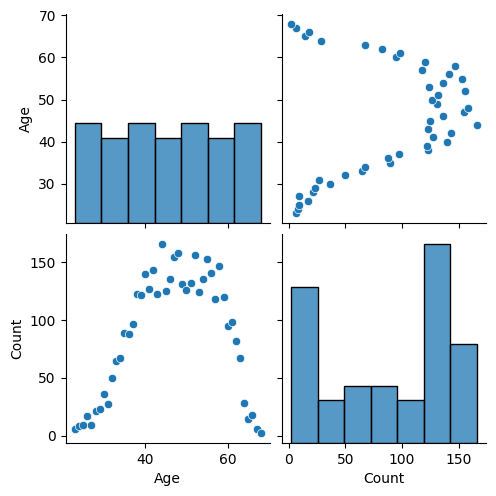

In [100]:
import seaborn as sns

sns.pairplot(df_clean_3)

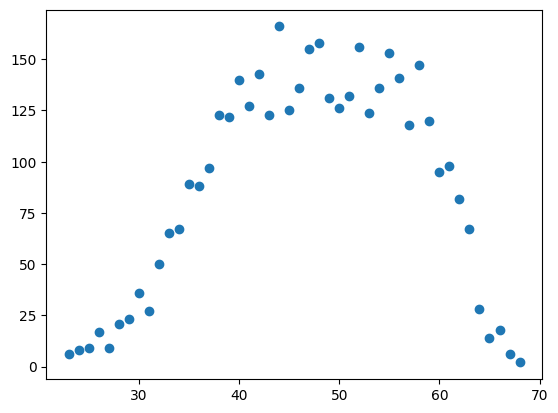

In [79]:
plt.scatter(df_clean_3["Age"], df_clean_3["Count"])

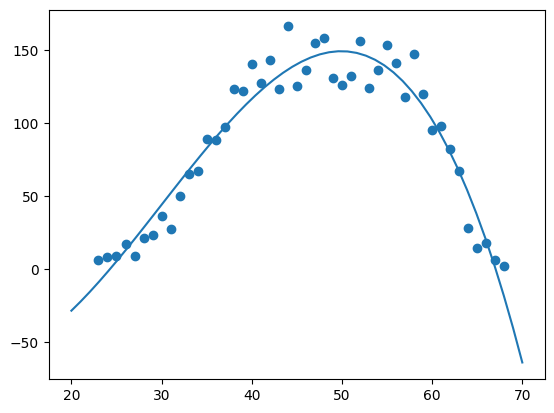

In [107]:
import numpy
import matplotlib.pyplot as plt

model = numpy.poly1d(numpy.polyfit( df_clean_3["Age"], df_clean_3["Count"], 3))

myline = numpy.linspace(20, 70, 50)

plt.scatter(df_clean_3["Age"], df_clean_3["Count"])
plt.plot(myline, model(myline))
plt.show()

# age_array = df_clean_3["Age"].to_numpy()[:, np.newaxis]
# age_array.shape

# model.fit(age_array, df_clean_3["Count"])

# print(model.coef_, model.intercept_)

# xfit = np.linspace(20, 80)
# Xfit = xfit[:, np.newaxis]
# yfit = model.predict(Xfit)
# print(yfit)

# plt.scatter(df_clean_3["Age"], df_clean_3["Count"])
# plt.plot(xfit, yfit)

## Reach a conclusion

What was the result of your experiment?

How can it be improved?

Elaborate in one thing you learn during the capstone project.

## Congratulations

You have finished the bootcamp!

![Congratulations](images/congratulations.jpg)